In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
pd.options.display.max_rows = 999

In [15]:
life_transform=pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions",life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,Developing,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,34.5,0.479,10.1
1,Afghanistan,Developing,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,35.0,0.476,10.0
2,Afghanistan,Developing,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,35.4,0.470,9.9
3,Afghanistan,Developing,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,35.9,0.463,9.8
4,Afghanistan,Developing,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,36.4,0.454,9.5


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
scaler= StandardScaler()

In [19]:
life_filled[['LIFE_EXPECTANCY_T',
             'ADULT_MORTALITY_T',
             'INFANT_DEATHS_T',
             'ALCOHOL_T',
             'PERCENTAGE_EXPENDITURE_T',
             'HEPATITIS_B_T',
             'MEASLES_T',
             'BMI_T',
             'UNDER_FIVE_DEATHS_T',
             'POLIO_T',
             'TOTAL_EXPENDITURE_T',
             'DIPHTHERIA_T',
             'HIV/AIDS_T',
             'GDP_T',
             'POPULATION_T',
             'THINNESS_5_to_19_YEARS_T',
             'INCOME_COMPOSITION_OF_RESOURCES_T',
             'SCHOOLING_T']]=scaler.fit_transform(life_filled[['LIFE_EXPECTANCY',
                                                         'ADULT_MORTALITY',
                                                         'INFANT_DEATHS',
                                                         'ALCOHOL',
                                                         'PERCENTAGE_EXPENDITURE',
                                                         'HEPATITIS_B',
                                                         'MEASLES',
                                                         'BMI',
                                                         'UNDER_FIVE_DEATHS',
                                                         'POLIO',
                                                         'TOTAL_EXPENDITURE',
                                                         'DIPHTHERIA',
                                                         'HIV/AIDS',
                                                         'GDP',
                                                         'POPULATION',
                                                         'THINNESS_5_to_19_YEARS',
                                                         'INCOME_COMPOSITION_OF_RESOURCES',
                                                         'SCHOOLING']])

In [20]:
life_filled

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,Afghanistan,Developing,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,0.255359,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097
1,Afghanistan,Developing,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,0.274060,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519
2,Afghanistan,Developing,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,0.292761,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942
3,Afghanistan,Developing,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,0.317696,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365
4,Afghanistan,Developing,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,0.342631,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,-0.000223,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900
2934,Zimbabwe,Developing,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,-0.006456,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632
2935,Zimbabwe,Developing,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,-0.012690,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519
2936,Zimbabwe,Developing,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,-0.018924,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365


In [21]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [23]:
life_filled_num=life_filled.drop(['COUNTRY','STATUS'],axis=1)
life_filled_num

,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0.255359,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0.274060,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0.292761,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0.317696,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0.342631,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,-0.000223,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,-0.006456,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,-0.012690,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,-0.018924,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


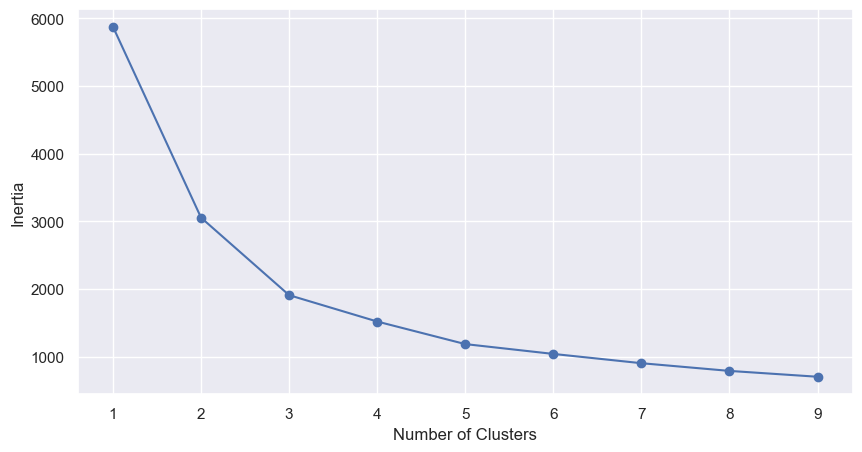

In [25]:
optimise_k_means(life_filled_num[['BMI_T','ADULT_MORTALITY_T']],10)

In [26]:
kmeans=KMeans(n_clusters=3)

In [28]:
kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])

KMeans(n_clusters=3)

In [29]:
life_filled_num['kmeans_3']=kmeans.labels_

In [31]:
life_filled_num

,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,...,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T,kmeans_3
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097,2
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519,2
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942,2
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365,2
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900,2
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632,2
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519,0
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365,2


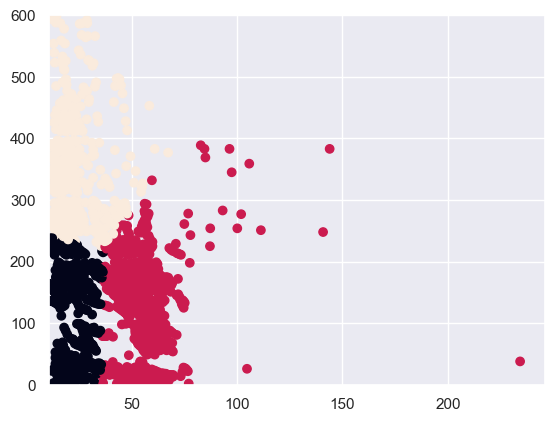

In [30]:
plt.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num['kmeans_3'])
plt.xlim(10.70)
plt.ylim(0,600)
plt.show()

## Create Multiple Clusters

In [33]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])
    life_filled_num[f'KMeans_{k}']=kmeans.labels_

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


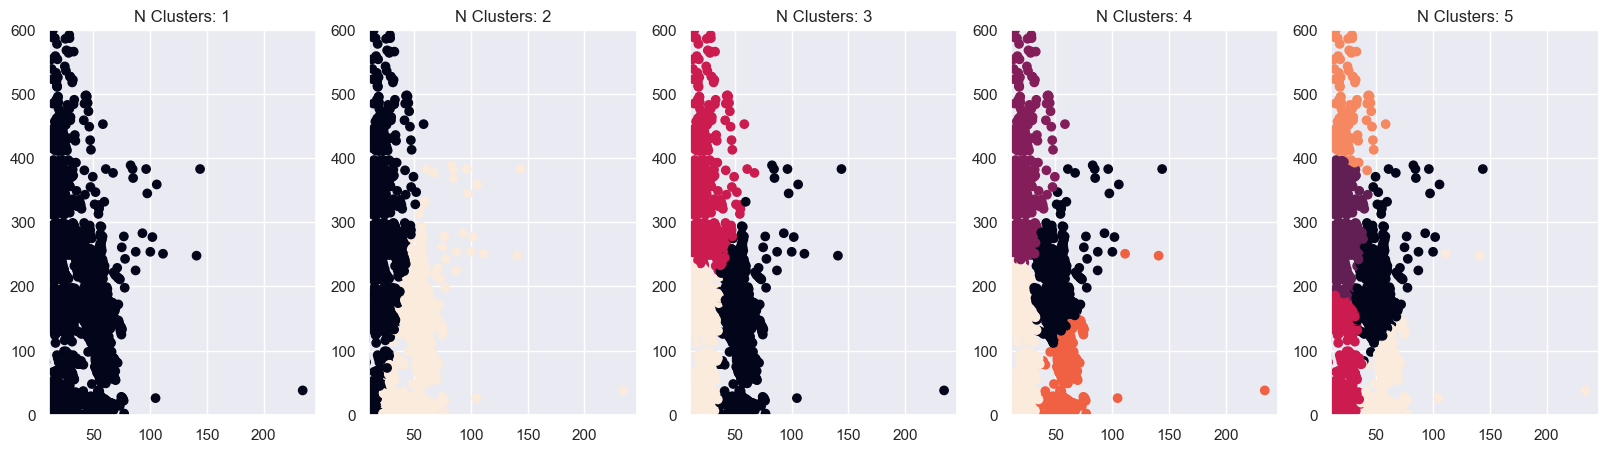

In [34]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num[f'KMeans_{i}'])
    ax.set_xlim(10.70)
    ax.set_ylim(0,600)
    ax.set_title(f'N Clusters: {i}')